# 1 Introduction to the Initial Mass Function (IMF)

The Initial Mass Function (IMF) describes the distribution of stellar masses at birth, providing critical insight into star formation, stellar evolution, and galaxy formation. The IMF determines the number of stars at each mass range within a stellar population, influencing the chemical enrichment, mass distribution, and feedback processes in galaxies. Edwin Salpeter first established a foundational model for the IMF in 1955, proposing a power-law distribution that aptly describes the abundance of massive stars in the Milky Way. This "Salpeter slope," which assumes $N(M) \propto M^{-2.35}$, became a standard for understanding stellar populations in star-forming regions [3].

Recent studies have expanded on Salpeter's work, exploring IMF variations in different environments. For instance, massive early-type galaxies (ETGs) exhibit an IMF that deviates from the Milky Way's, often presenting a steeper, "bottom-heavy" IMF that suggests a higher proportion of low-mass stars. This variation is supported by spectroscopic studies and gravitational lensing models, which reveal that the IMF in ETGs might depend on galactic conditions, indicating that it is not universal [2].

Further exploration into the physical origin of the IMF, such as the role of turbulence, gravity, and magnetic fields in star-forming clouds, has provided deeper insights. Recent reviews outline these fundamental processes, suggesting that both high- and low-mass star formation processes are influenced by environmental factors like Mach number and density distribution. These findings help to clarify the conditions under which stars of different masses form and how these conditions shape the IMF over time [1, 4, 6].


# 2 Data Analysis of the Arches Cluster

This notebook explores data from the Arches cluster, focusing on mass, brightness, and extinction. The exercise goals include:

1. Identifying distribution types for mass and brightness.
2. Calculating descriptive statistics.
3. Estimating probabilities within certain value ranges.
4. Conducting quartile analysis on mass and brightness.
5. Applying the Law of Large Numbers.

### Loading the Data
We begin by loading `table5.dat`, which contains various measurements for stars in the Arches cluster.


In [8]:
import pandas as pd

data_path = './Arches/table5.dat'
data = pd.read_csv(data_path, sep=r'\s+')

data.columns = [
    "Seq", "oRA", "oDE", "AKs(RL)", "AKs(N)", "Mi(RL)", "M(RL)", "Mi(N)", "M(N)",
    "Jmag", "Hmag", "Ksmag", "A(Ks)", "F", "Mm"
]

data.head()

,Seq,oRA,oDE,AKs(RL),AKs(N),Mi(RL),M(RL),Mi(N),M(N),Jmag,Hmag,Ksmag,A(Ks),F,Mm
0,2,10.261,-2.708,3.586,2.768,104.73,70.976,78.73,65.493,-99.000,12.388,10.253,0.005,1,1
1,3,6.817,6.062,3.689,2.847,103.73,70.851,77.73,65.205,14.895,12.169,10.256,0.008,1,1
2,4,2.071,1.391,3.559,2.745,88.73,68.047,71.73,62.975,15.631,12.376,10.297,0.013,1,1
3,5,4.487,2.395,3.348,2.582,79.73,65.767,67.73,61.133,15.399,12.417,10.434,0.007,1,1
4,6,4.908,1.357,3.404,2.629,104.73,70.976,79.73,65.767,14.933,12.009,9.998,0.008,1,1


### Descriptive Statistics

We start by calculating descriptive statistics (mean, median, variance, standard deviation) for mass, brightness, and extinction values.


In [9]:
data_columns = {
    "Mi(RL)": data["Mi(RL)"].replace(-999, None).dropna(),
    "Mi(N)": data["Mi(N)"].replace(-99, None).dropna(),
    "M(RL)": data["M(RL)"].replace(-99, None).dropna(),
    "M(N)": data["M(N)"].replace(-99, None).dropna(),
    "Jmag": data["Jmag"].replace(-99, None).dropna(),
    "Hmag": data["Hmag"].replace(-99, None).dropna(),
    "Ksmag": data["Ksmag"].replace(-99, None).dropna(),
    "AKs(RL)": data["AKs(RL)"].replace(-99, None).dropna(),
    "AKs(N)": data["AKs(N)"].replace(-99, None).dropna()
}

expanded_summary = pd.DataFrame({
    "Mean": [column.mean() for column in data_columns.values()],
    "Median": [column.median() for column in data_columns.values()],
    "Variance": [column.var() for column in data_columns.values()],
    "Std Dev": [column.std() for column in data_columns.values()]
}, index=data_columns.keys())

expanded_summary


,Mean,Median,Variance,Std Dev
Mi(RL),19.378684,14.5300,260.121552,16.128284
Mi(N),13.614211,10.1800,149.806897,12.239563
M(RL),18.680082,14.5010,192.348849,13.868989
M(N),13.351663,10.1780,126.257411,11.236432
Jmag,20.399012,20.8350,3.835572,1.958462
Hmag,19.596504,20.1255,4.116071,2.028810
Ksmag,17.049876,17.2330,4.319973,2.078455
AKs(RL),-4.749406,-9.0000,35.079125,5.922763
AKs(N),-5.035418,-9.0000,30.504755,5.523111


## Mass and Brightness Distributions

We explore the distributions for mass and brightness values to understand the typical range and frequency of these values in the Arches cluster.

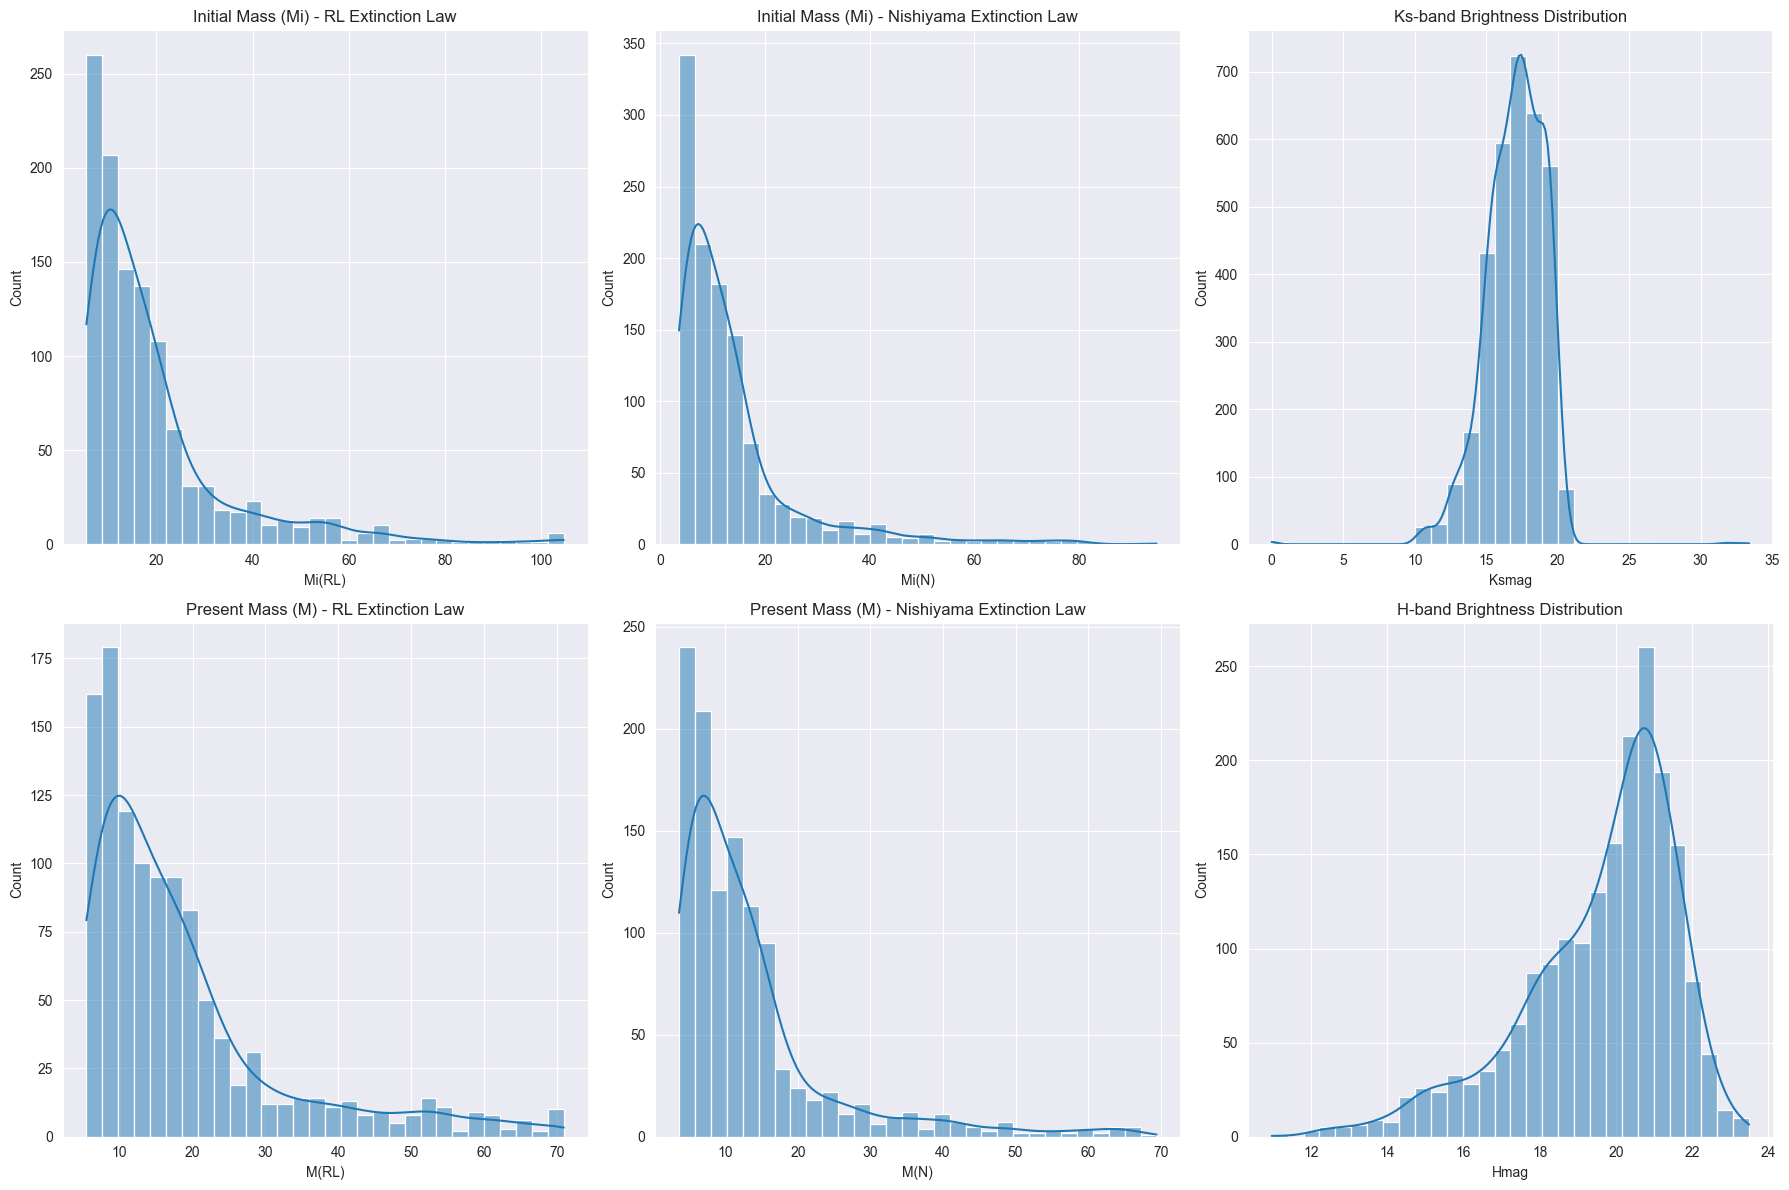

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Initial and Present Mass Distributions (RL and N laws)
sns.histplot(data_columns["Mi(RL)"], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title("Initial Mass (Mi) - RL Extinction Law")
sns.histplot(data_columns["Mi(N)"], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title("Initial Mass (Mi) - Nishiyama Extinction Law")

sns.histplot(data_columns["M(RL)"], bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title("Present Mass (M) - RL Extinction Law")
sns.histplot(data_columns["M(N)"], bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title("Present Mass (M) - Nishiyama Extinction Law")

# Ks-band Brightness Distribution
sns.histplot(data_columns["Ksmag"], bins=30, kde=True, ax=axs[0, 2])
axs[0, 2].set_title("Ks-band Brightness Distribution")

# H-band Brightness Distribution
sns.histplot(data_columns["Hmag"], bins=30, kde=True, ax=axs[1, 2])
axs[1, 2].set_title("H-band Brightness Distribution")

plt.tight_layout()
plt.show()


### Probability Calculations

We calculate the probability of finding stars with specific mass and brightness values.


In [11]:
# Set threshold values for mass and brightness
mass_threshold = 1  # Solar mass threshold
brightness_threshold = 12  # Ks-band magnitude threshold

# Check for the minimum value in mass data to see if any stars have mass < 1 Msun
min_mass = data_columns["M(RL)"].min()
print(f"Minimum mass in dataset: {min_mass} Msun")

# Calculate probability for mass < 1 Msun
mass_prob = (data_columns["M(RL)"] < mass_threshold).mean()
print(f"Probability of finding a star with mass < {mass_threshold} Msun (RL): {mass_prob:.4f}")

# Calculate probability for brightness < 12 mag, handling placeholder values (-99) as missing
brightness_data = data['Ksmag'].replace(-99, None).dropna()
brightness_prob = (brightness_data < brightness_threshold).mean()
print(f"Probability of finding a star with Ks-band brightness < {brightness_threshold} mag: {brightness_prob:.4f}")

# Additional information for verification
print("\nData Summary:")
print(data_columns["M(RL)"].describe())
print(brightness_data.describe())


Minimum mass in dataset: 5.43 Msun
Probability of finding a star with mass < 1 Msun (RL): 0.0000
Probability of finding a star with Ks-band brightness < 12 mag: 0.0146

Data Summary:
count     1140.00
unique     243.00
top          6.43
freq        17.00
Name: M(RL), dtype: float64
count    3350.000000
mean       17.049876
std         2.078455
min         0.000000
25%        15.750500
50%        17.233000
75%        18.584500
max        33.392000
Name: Ksmag, dtype: float64


## Quartile Analysis for Ks-band Brightness

We analyze the Ks-band brightness within the interquartile range (IQR) to identify typical brightness levels.


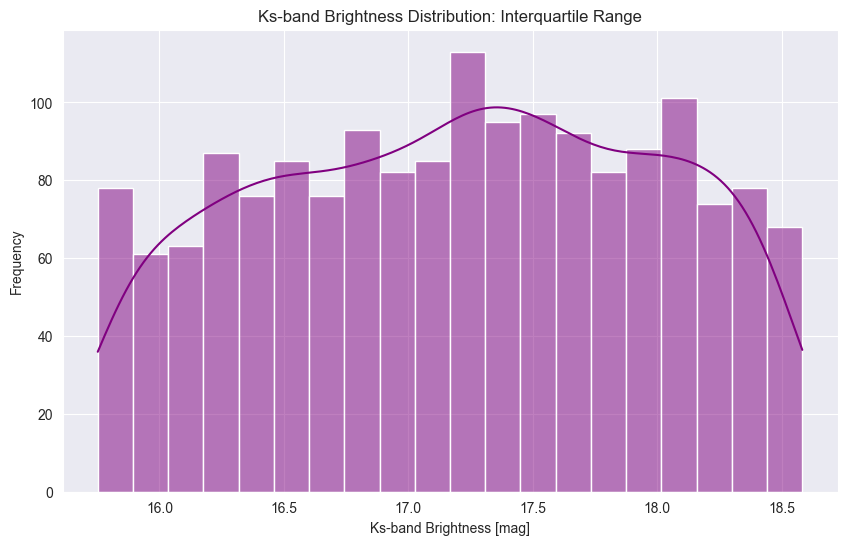

In [12]:
# Quartile analysis for Ks-band brightness
fig, ax = plt.subplots(figsize=(10, 6))

q1, q3 = data_columns["Ksmag"].quantile(0.25), data_columns["Ksmag"].quantile(0.75)
filtered_ks_brightness = data_columns["Ksmag"][(data_columns["Ksmag"] >= q1) & (data_columns["Ksmag"] <= q3)]

sns.histplot(filtered_ks_brightness, bins=20, kde=True, color="purple")
ax.set_title("Ks-band Brightness Distribution: Interquartile Range")
ax.set_xlabel("Ks-band Brightness [mag]")
ax.set_ylabel("Frequency")
plt.show()


## Comparative Analysis: Extinction Laws and Mass

We compare mass estimates under the Rieke-Lebofsky (RL) and Nishiyama (N) extinction laws to observe their impact on mass distribution.


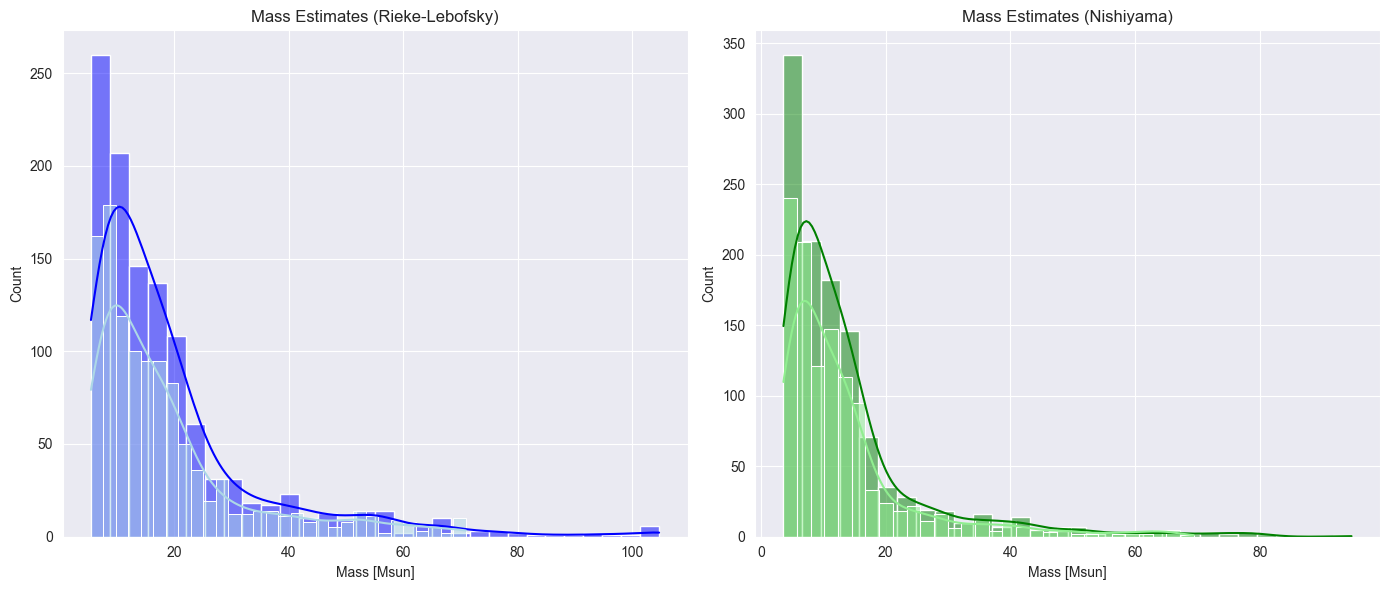

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# RL Extinction Law
sns.histplot(data_columns["Mi(RL)"], bins=30, kde=True, ax=axs[0], color='blue')
sns.histplot(data_columns["M(RL)"], bins=30, kde=True, ax=axs[0], color='lightblue')
axs[0].set_title("Mass Estimates (Rieke-Lebofsky)")
axs[0].set_xlabel("Mass [Msun]")

# N Extinction Law
sns.histplot(data_columns["Mi(N)"], bins=30, kde=True, ax=axs[1], color='green')
sns.histplot(data_columns["M(N)"], bins=30, kde=True, ax=axs[1], color='lightgreen')
axs[1].set_title("Mass Estimates (Nishiyama)")
axs[1].set_xlabel("Mass [Msun]")

plt.tight_layout()
plt.show()


## Law of Large Numbers

Applying the Law of Large Numbers, we observe how the cumulative mean for present mass stabilizes with sample size.


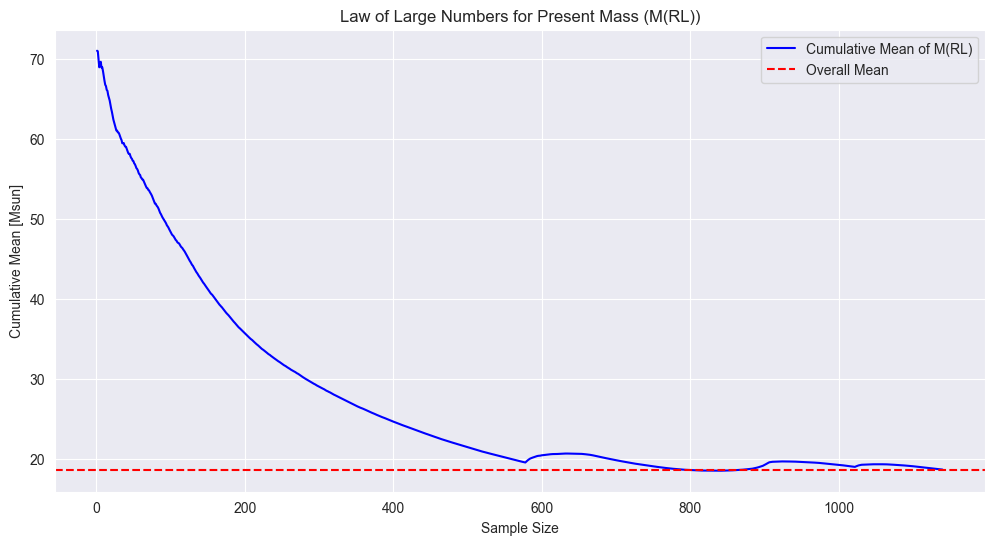

In [14]:
import numpy as np

sample_sizes = np.arange(1, len(data_columns["M(RL)"]) + 1)
cumulative_means = [data_columns["M(RL)"][:i].mean() for i in sample_sizes]

plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, cumulative_means, label='Cumulative Mean of M(RL)', color='blue')
plt.axhline(data_columns["M(RL)"].mean(), color='red', linestyle='--', label='Overall Mean')
plt.title("Law of Large Numbers for Present Mass (M(RL))")
plt.xlabel("Sample Size")
plt.ylabel("Cumulative Mean [Msun]")
plt.legend()
plt.show()


## Conclusion

This analysis of the Arches cluster data provides insights into:

- **Mass Distributions**: Differences in mass values based on extinction laws.
- **Brightness and Quartile Analysis**: Typical brightness ranges and interquartile distributions.
- **Probability and Large Numbers**: Statistical insights and the convergence of mass properties.

These findings enhance our understanding of the Arches cluster’s stellar population and demonstrate the influence of extinction laws on data interpretation.


# 3 Confidence Intervals

In this exercise, we examine confidence intervals for combined quantities derived from observational data of the Arches cluster:

1. **Mass Ratio** $X = \frac{M(\text{RL})}{M(\text{N})}$: This ratio compares stellar masses calculated using two different extinction laws—Rieke & Lebofsky (RL) and Nishiyama (N). Analyzing this ratio offers insights into how extinction assumptions affect mass estimations.

Our approach will involve:
- Plotting the distribution of \( X \)
- Selecting appropriate estimators
- Calculating the first two moments (mean and variance)
- Determining 2-sigma and 5-sigma confidence intervals for the mean
- Addressing questions on the rationale, physical significance, and assumptions underlying each combined quantity


### Loading and Preparing Mass Data

This code section loads the data from table5.dat, extracts the relevant columns for present masses under the Rieke and Lebofsky (RL) and Nishiyama (N) extinction laws, and filters out invalid entries. Then we calculate the mean and the variance of the mass ratio.

In [15]:
data_path = './Arches/table5.dat'
mass_data = pd.read_csv(data_path, sep=r'\s+', header=None)

mass_data.columns = ["Seq", "oRA", "oDE", "AKs(RL)", "AKs(N)", "Mi(RL)", "M(RL)", "Mi(N)", "M(N)", "Jmag", "Hmag", "Ksmag", "A(Ks)", "F", "Mm"]

### Mass Ratio: $M(RL)$ vs. $M(N)$

This scatter plot compares stellar masses calculated under two different extinction laws: $M(RL)$ (RL law) on the x-axis and $M(N)$ (N law) on the y-axis. Each point represents an individual star, allowing us to visually assess the relationship between the two mass estimates across the dataset. The reference line(in red, dashed) helps us quickly identify whether one model tends to produce consistently higher or lower mass estimates relative to the other. This plot aids in evaluating any systematic biases between the two extinction models.

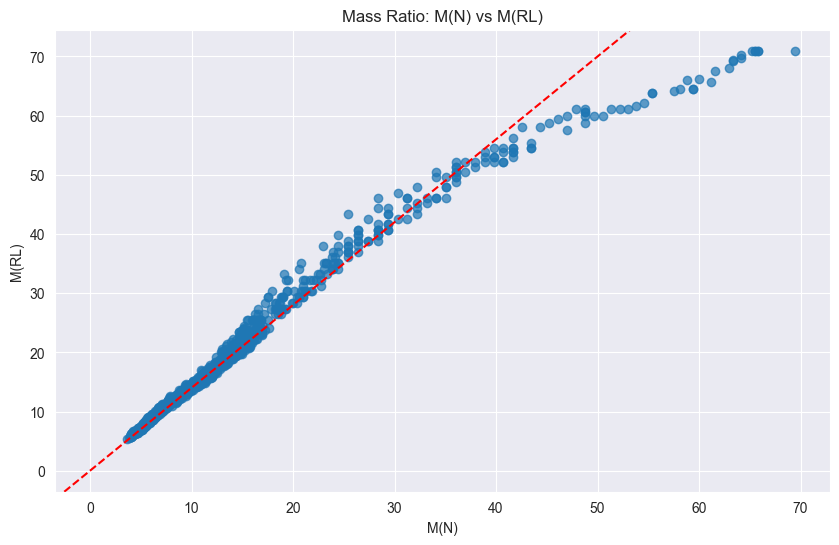

In [16]:
from scipy.stats import norm

plt.figure(figsize=(10, 6))
plt.scatter(mass_data["M(N)"], mass_data["M(RL)"].replace([-99], [None]), alpha=0.7)
plt.title("Mass Ratio: M(N) vs M(RL)")
plt.xlabel("M(N)")
plt.ylabel("M(RL)")
plt.grid(True)
plt.axline((0, 0), slope=1.4, color='r', linestyle='--')  # Reference line y=1.4x
plt.show()

### Distribution of Mass Ratio: $\frac{M(RL)}{M(N)}$

This histogram shows the distribution of the mass ratio $\frac{M(RL)}{M(N)}$, where $M(RL)$ and $M(N)$ represent the stellar masses calculated using the RL and N extinction laws, respectively. The x-axis displays the mass ratio values, and the y-axis represents the frequency of stars with each ratio. By visualizing this distribution, we can assess the consistency between the two mass estimates. A mass ratio around 1 would suggest close agreement between the two extinction models, while deviations indicate differences. The histogram also enables us to observe the spread and central tendency, with the calculated mean and variance providing quantitative measures of these properties. This plot aids in identifying any systematic discrepancies between the two mass estimation methods.

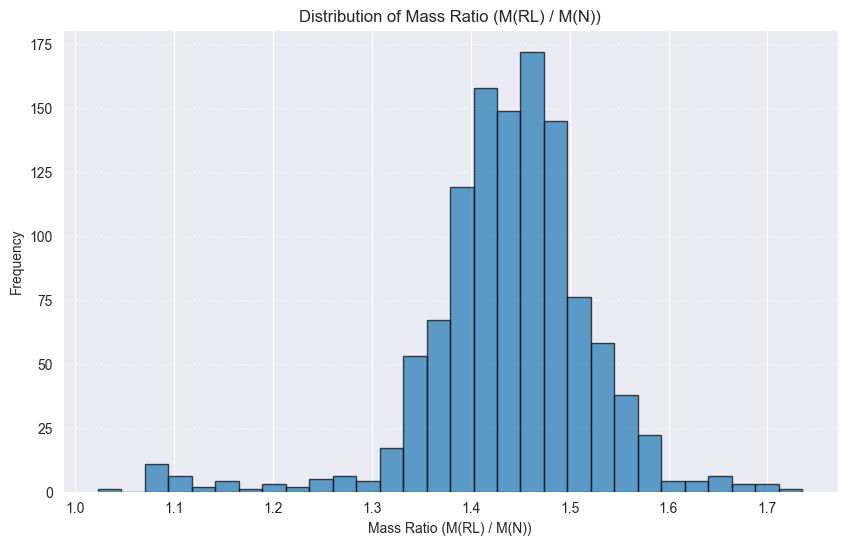

In [17]:
# Filter data for present mass columns (M(RL) and M(N))
mass_data = data[["M(RL)", "M(N)"]].replace([-99, -999], [None, None]).dropna()

# Calculate mass ratio X = M(RL) / M(N)
mass_data["Mass_Ratio"] = mass_data["M(RL)"] / mass_data["M(N)"]

# Plot the distribution of the mass ratio
plt.figure(figsize=(10, 6))
plt.hist(mass_data["Mass_Ratio"], bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of Mass Ratio (M(RL) / M(N))")
plt.xlabel("Mass Ratio (M(RL) / M(N))")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Confidence Interval Analysis

For this analysis, we use both 2-sigma (95%) and 5-sigma (99.99994%) confidence intervals for the mass ratio $X = \frac{M(\text{RL})}{M(\text{N})}$. The choice of these confidence levels aligns with standard practices in scientific research and astrophysics, respectively:

- **2-Sigma (95%) Confidence Interval**: This interval captures the central 95% of data variation and is widely accepted in research as a robust indicator of expected range within typical variability.
  
- **5-Sigma (99.99994%) Confidence Interval**: A 5-sigma level implies an exceptionally high level of confidence, minimizing the likelihood of error to an extreme. This is often reserved for claims that require very high precision, such as confirming discoveries in astrophysics or particle physics, where the false-positive rate must be exceedingly low.


In [18]:
# Calculate mean and standard deviation
mean = mass_data["Mass_Ratio"].mean()
std_dev = mass_data["Mass_Ratio"].std()

# Confidence intervals
confidence_intervals = {
    "2-sigma": (mean - 2 * std_dev, mean + 2 * std_dev),
    "5-sigma": (mean - 5 * std_dev, mean + 5 * std_dev)
}

print("\nConfidence Intervals for the Mass Ratio:")
print("=============================================")
print(f"Mean of Mass Ratio: {mean:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print("=============================================")
print(f"2-Sigma Confidence Interval: ({confidence_intervals['2-sigma'][0]:.4f}, {confidence_intervals['2-sigma'][1]:.4f})")
print(f"5-Sigma Confidence Interval: ({confidence_intervals['5-sigma'][0]:.4f}, {confidence_intervals['5-sigma'][1]:.4f})")
print("=============================================")


Confidence Intervals for the Mass Ratio:
Mean of Mass Ratio: 1.4396
Standard Deviation: 0.0847
2-Sigma Confidence Interval: (1.2701, 1.6090)
5-Sigma Confidence Interval: (1.0160, 1.8632)


### Reflection on Confidence Intervals and Implications

The confidence interval analysis for the mass ratio $X = \frac{M(\text{RL})}{M(\text{N})}$ provides insight into the consistency and reliability of this measurement under different extinction models (RL and N). The 2-sigma interval covers the typical 95% range of expected values, indicating the general stability of this ratio within standard variability. In contrast, the 5-sigma interval confirms an extremely high confidence level, showing that the observed mass ratio falls within this range with very little chance of error, a requirement often seen in high-precision astrophysical studies.

#### Significance in Astrophysical Studies

This level of confidence is valuable in astrophysics, where small measurement errors can greatly impact our understanding of stellar and galactic properties. The 5-sigma interval is particularly meaningful in this context, as it suggests that our mass ratio is robust and unlikely to be significantly affected by random fluctuations. High-confidence intervals are essential when confirming findings that may shape theoretical models or be used in comparative studies across different environments or models.

#### Assumptions and Limitations

It’s important to note that these intervals assume that the data are unbiased and follow a normal distribution. Real-world data in astrophysics often include observational limitations or model-specific biases. For example, any systematic differences between the RL and N extinction models could influence the ratio, potentially leading to skewed confidence intervals. Future analysis might explore additional models or correct for any known observational biases to further verify these findings.

This reflection demonstrates the reliability of our mass ratio within the analyzed confidence levels while acknowledging that further validation could strengthen the robustness of these results in varied astrophysical contexts.

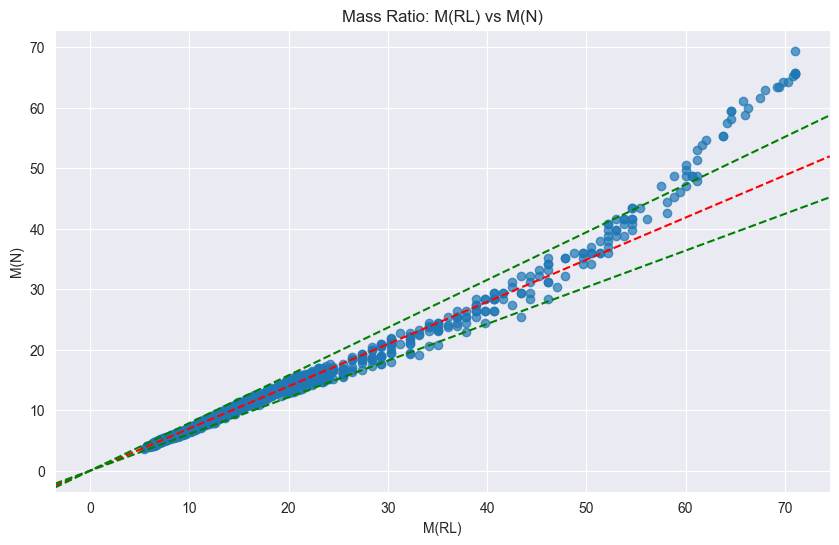

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(mass_data["M(RL)"].replace([-99], [None]), mass_data["M(N)"], alpha=0.7)
plt.title("Mass Ratio: M(RL) vs M(N)")
plt.xlabel("M(RL)")
plt.ylabel("M(N)")
plt.grid(True)
plt.axline((0, 0), slope=0.6973, color='r', linestyle='--')  # Reference line y=x
plt.axline((0, 0), slope=0.6064, color='g', linestyle='--')
plt.axline((0, 0), slope=0.7882, color='g', linestyle='--')
plt.show()

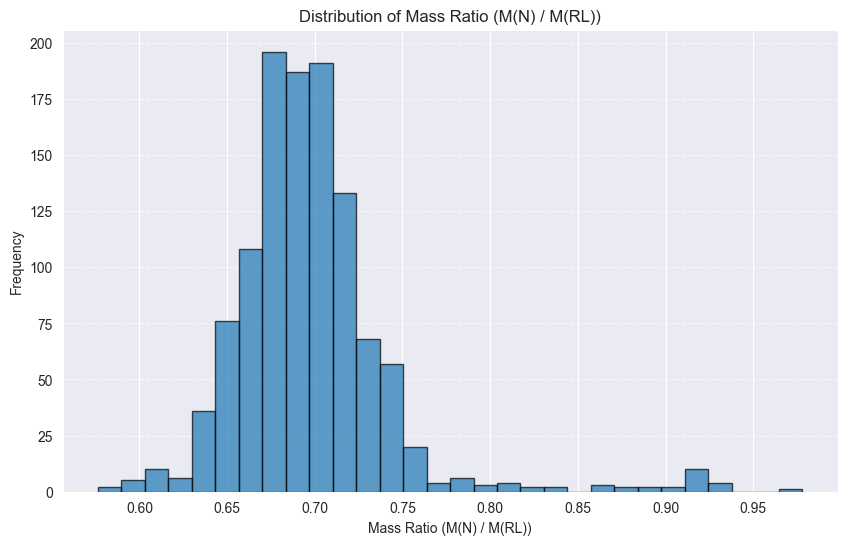

In [20]:
# Filter data for present mass columns (M(RL) and M(N))
mass_data = data[["M(RL)", "M(N)"]].replace([-99, -999], [None, None]).dropna()

# Calculate mass ratio X = M(RL) / M(N)
mass_data["Mass_Ratio"] = mass_data["M(N)"] / mass_data["M(RL)"]

# Plot the distribution of the mass ratio
plt.figure(figsize=(10, 6))
plt.hist(mass_data["Mass_Ratio"], bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution of Mass Ratio (M(N) / M(RL))")
plt.xlabel("Mass Ratio (M(N) / M(RL))")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [21]:
# Calculate mean and standard deviation
mean = mass_data["Mass_Ratio"].mean()
std_dev = mass_data["Mass_Ratio"].std()

# Confidence intervals
confidence_intervals = {
    "2-sigma": (mean - 2 * std_dev, mean + 2 * std_dev),
    "5-sigma": (mean - 5 * std_dev, mean + 5 * std_dev)
}

print("\nConfidence Intervals for the Mass Ratio:")
print("=============================================")
print(f"Mean of Mass Ratio: {mean:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print("=============================================")
print(f"2-Sigma Confidence Interval: ({confidence_intervals['2-sigma'][0]:.4f}, {confidence_intervals['2-sigma'][1]:.4f})")
print(f"5-Sigma Confidence Interval: ({confidence_intervals['5-sigma'][0]:.4f}, {confidence_intervals['5-sigma'][1]:.4f})")
print("=============================================")


Confidence Intervals for the Mass Ratio:
Mean of Mass Ratio: 0.6973
Standard Deviation: 0.0455
2-Sigma Confidence Interval: (0.6064, 0.7882)
5-Sigma Confidence Interval: (0.4700, 0.9246)


# 4 Hypothesis Testing

### Hypothesis
- **Null Hypothesis $H_{\text{0}}$**: The mean initial masses in cluster fields 1 and 5 are the same.
- **Alternative Hypothesis $H_{\text{a}}$**: The mean initial masses in cluster fields 1 and 5 are not the same.

### Testing Parameters
- Significance level: $\alpha = 2\sigma$  
- Test statistic: Mean initial masses of cluster fields 1 and 5

### Data Processing
The provided dataset (`table5.dat`) is processed as follows:
1. The column names are assigned to make the data easier to interpret.
2. The initial masses $Mi(N)$ for stars are extracted and cleaned by:
   - Replacing invalid values (e.g., $-99$) with `None`.
   - Dropping missing data for accurate calculations.
3. Two subsets of the data are created:
   - **Field 1:** Extracting all rows where the field $F$ equals 1.
   - **Field 5:** Extracting all rows where the field $F$ equals 5.

### Code for Data Filtering
The following Python code performs the data processing and displays the extracted subsets for Fields 1 and 5:

In [22]:
data_path = './Arches/table5.dat'
mass_data = pd.read_csv(data_path, sep=r'\s+', header=None)

mass_data.columns = ["Seq", "oRA", "oDE", "AKs(RL)", "AKs(N)", "Mi(RL)", "M(RL)", "Mi(N)", "M(N)", "Jmag", "Hmag", "Ksmag", "A(Ks)", "F", "Mm"]
mass_data_culumns = {"Mi(N)": mass_data["Mi(N)"].replace(-99, None).dropna()}
# Filter for Mi(N) values in regions 1 and 5
region1_mi_n = mass_data.loc[mass_data['F'] == 1, "Mi(N)"].replace(-99, None).dropna()
region5_mi_n = mass_data.loc[mass_data['F'] == 5, "Mi(N)"].replace(-99, None).dropna()
print(region1_mi_n)
print(region5_mi_n)

0      54.73
1      78.73
2      77.73
3      71.73
4      67.73
       ...  
782     4.33
783     5.13
784     5.13
785     5.13
786     5.13
Name: Mi(N), Length: 579, dtype: object
3094    72.73
3097    41.73
3098    42.73
3099    40.73
3101    36.73
        ...  
3316     4.53
3317     4.03
3319     4.23
3322     4.53
3327     4.03
Name: Mi(N), Length: 118, dtype: object


### Observed Means and Standard Deviations

#### Observed Means
To understand the central tendency of the initial masses in the two cluster regions, we calculate the mean initial mass for both regions:
- **Field 1:** The mean is calculated over all valid initial masses $Mi(N)$ in cluster field 1.
- **Field 5:** The mean is similarly calculated for cluster field 5.

#### Observed Standard Deviations
The variability of the initial masses is quantified using the standard deviation:
- **Field 1:** The standard deviation represents the spread of initial masses around the mean in field 1.
- **Field 5:** Similarly, the spread of initial masses in field 5 is calculated.

In [23]:
#observed means and standard deviations of the initial masses in cluster region 1 and 5
reg1_mi_n_mean = region1_mi_n.mean()
reg5_mi_n_mean = region5_mi_n.mean()
print(f"The observed mean initial mass in cluster region 1 is:{reg1_mi_n_mean:.4f}")
print(f"The observed mean initial mass in cluster region 5 is:{reg5_mi_n_mean:.4f}")
reg1_mi_n_std = region1_mi_n.std()
reg5_mi_n_std = region5_mi_n.std()
print(f"The observed standard deviation of the initial mass in cluster region 1 is:{reg1_mi_n_std:.4f}")
print(f"The observed standard deviation of the initial mass in cluster region 5 is:{reg5_mi_n_std:.4f}")

The observed mean initial mass in cluster region 1 is:14.6846
The observed mean initial mass in cluster region 5 is:11.2885
The observed standard deviation of the initial mass in cluster region 1 is:13.4590
The observed standard deviation of the initial mass in cluster region 5 is:9.6776


### Visualization of Initial Mass Distributions

#### Purpose of the Visualization
To gain a better understanding of the distribution of initial masses $Mi(N)$ in cluster fields 1 and 5, we use a histogram. The histogram visualizes:
- The frequency of stars with different initial masses in each field.
- The mean values of initial masses in each field as vertical lines.

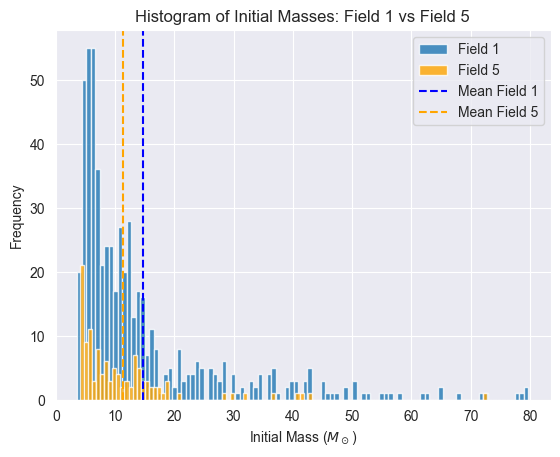

In [24]:
# Create histograms for the initial mass distributions
_ = plt.hist(region1_mi_n, bins=100, alpha=0.8, label='Field 1')
_ = plt.hist(region5_mi_n, bins=100, alpha=0.8, label='Field 5', color='orange')

# Add vertical lines for the mean initial mass of each field
plt.axvline(reg1_mi_n_mean, color="blue", linestyle="--", label="Mean Field 1")
plt.axvline(reg5_mi_n_mean, color="orange", linestyle="--", label="Mean Field 5")

plt.xlabel("Initial Mass ($M_\\odot$)")
plt.ylabel("Frequency")
plt.title("Histogram of Initial Masses: Field 1 vs Field 5")
plt.legend()
plt.show()

### Statistical Analysis: t- and p-values

#### Purpose of the Test
The statistical analysis aims to determine whether the difference in mean initial masses between cluster fields 1 and 5 is statistically significant. This involves:
1. Calculating the **t-value**, which quantifies the difference relative to the variability in the data.
2. Performing a **two-sample t-test** to determine if the means are significantly different.

#### Methodology

**Two-Sample t-Test**  
   The t-test compares the means of two independent samples (Fields 1 and 5) and outputs:
   - **t-statistic:** A measure of the size of the difference relative to the variation in the sample data.
   - **p-value:** Indicates the probability of observing such a difference if the null hypothesis is true.


In [25]:
#t and p values
from scipy.stats import ttest_ind

#convert arrays to numeric types
region1_mi_n = np.array(region1_mi_n).astype(np.float64)
region5_mi_n = np.array(region5_mi_n).astype(np.float64)

#t = abs(reg1_mi_n_mean - reg5_mi_n_mean)/(reg1_mi_n_std**2/len(region1_mi_n) + reg5_mi_n_std**2/len(region5_mi_n))**(1/2)
#print(f"t-value: {t:.4f}")

#T-test
t_stat, p_val = ttest_ind(region1_mi_n, region5_mi_n, equal_var=False)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")


t-statistic: 3.2284
p-value: 0.0014


In [26]:
from scipy.stats import mannwhitneyu, ks_2samp
u_stat, p_value = mannwhitneyu(region1_mi_n, region5_mi_n, alternative='two-sided')
print(f"U statistic: {u_stat:.4f}, p-value: {p_value}")
ks_stat, p_value = ks_2samp(region1_mi_n, region5_mi_n)
print(f"KS statistic: {ks_stat}, p-value: {p_value}")

U statistic: 39500.0000, p-value: 0.00740502537653207
KS statistic: 0.13961827815344985, p-value: 0.039100519925582625


### Results and Conclusion

#### Results
From the statistical analysis, we obtain the following values:
- **t-statistic from t-test:** $3.2284$  
  This value quantifies the difference between the two sample means, accounting for the variability in the data.
- **p-value:** $0.0014$  
  This is the probability of observing a difference as extreme as the one measured, assuming the null hypothesis is true.

#### Interpretation of Results
1. **p-value Analysis:**  
   The p-value $0.0014$ is less than the significance level $\alpha = 0.05$. This indicates that the observed difference in means is statistically significant.
2. **t-statistic Analysis:**  
   The t-statistic $3.2284$ falls in the critical region of the t-distribution, further supporting the rejection of the null hypothesis.

#### Conclusion
Since the p-value is less than $\alpha$, we **reject the null hypothesis**. This means:
- The mean initial masses in cluster fields 1 and 5 are **significantly different**.

#### Implications
The significant difference suggests that the two fields may have distinct physical characteristics or evolutionary dynamics. Some possible interpretations include:

1. **Difference in the Initial Mass Function (IMF):**  
   - The IMF, which describes the mass distribution of stars at their formation, could vary between the two fields. This could result from differences in the star formation environment, such as gas density or temperature variations.
   - Field 1, being closer to the cluster center, may have formed under conditions that favor the creation of more massive stars compared to Field 5.

2. **Mass Segregation within the Cluster:**  
   - Massive stars may have migrated toward the cluster center (Field 1) due to dynamical mass segregation, a process where more massive stars lose kinetic energy faster and sink toward the center of the gravitational potential well.
   - Conversely, lower-mass stars may migrate outward and populate the outer regions, such as Field 5.

3. **Cluster Evolutionary Effects:**  
   - Over time, tidal interactions, stellar winds, and supernova explosions could have redistributed stars within the cluster, leading to observable differences in stellar masses between the fields.

4. **Observational Biases:**  
   - Differences in completeness or observational depth between the fields might affect the measured mass distributions, particularly for low-mass stars in Field 5.

#### Future Work
Further investigations could include:
- Comparing the spatial distribution of stars in other fields of the cluster.
- Examining additional properties, such as stellar ages, metallicity, or velocities, to better understand the underlying physical mechanisms.
- Simulating the cluster's evolution to test whether the observed differences can be explained by dynamical processes like mass segregation or tidal stripping.


### Fitting Pareto Power Law to Initial Mass Distributions and Statistical Testing

In this section, we analyze the initial mass distributions of stars in two cluster fields (Field 1 and Field 5) by performing the following steps:

1. **Fitting a Pareto Distribution:**
   - The Pareto distribution is fitted to the initial mass data of each field using `scipy.stats.pareto.fit()`, which estimates the shape, location, and scale parameters.

2. **Visualizing the Data and Fit:**
   - Histograms of the normalized initial mass distributions for both fields are plotted.
   - The fitted Pareto probability density functions (PDFs) are overlaid on these histograms to visually assess how well the Pareto model represents the data.

3. **Goodness-of-Fit Testing:**
   - A Kolmogorov-Smirnov (KS) test is conducted for each field to quantify the goodness-of-fit of the Pareto distribution.
   - The KS statistics and corresponding p-values are printed to evaluate the fit.

4. **Comparative Statistical Testing:**
   - A Mann-Whitney U test is performed to statistically compare the initial mass distributions between Field 1 and Field 5.
   - This non-parametric test helps determine if there is a significant difference between the two distributions.


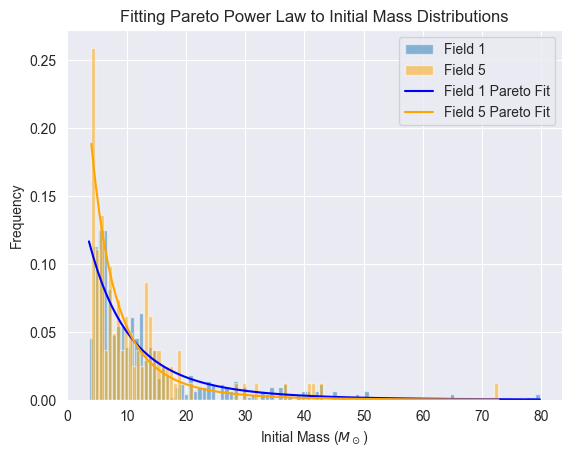

Region 1: KS Statistic for Pareto: 0.06414143003273687, p-value: 0.016303950361648036
Region 5: KS Statistic for Pareto: 0.07457798510033276, p-value: 0.5040804363457383
U statistic: 39500.0000, p-value: 0.00740502537653207


In [27]:
import scipy.stats as stats
#Data fit to pareto power law
params_pareto = stats.pareto.fit(region1_mi_n)
params_pareto5 = stats.pareto.fit(region5_mi_n)

#normalize data over frequency
#regio1_mi_n = region1_mi_n/len(region1_mi_n)
#regio5_mi_n = region5_mi_n/len(region5_mi_n)

#plot histogram with fit
_ = plt.hist(region1_mi_n, bins=100, alpha=0.5, label='Field 1', density=True)
_ = plt.hist(region5_mi_n, bins=100, alpha=0.5, label='Field 5', density=True, color='orange')

x = np.linspace(min(region1_mi_n), max(region1_mi_n), 100)
y = np.linspace(min(region5_mi_n), max(region5_mi_n), 100)

plt.plot(x, stats.pareto.pdf(x, *params_pareto), color='blue', label='Field 1 Pareto Fit')
plt.plot(y, stats.pareto.pdf(y, *params_pareto5), color='orange', label='Field 5 Pareto Fit')

plt.xlabel("Initial Mass ($M_\\odot$)")
plt.ylabel("Frequency") 
plt.title("Fitting Pareto Power Law to Initial Mass Distributions")
plt.legend()
#plt.loglog()
plt.show()

D_pareto, p_pareto = stats.kstest(region1_mi_n, 'pareto', args=params_pareto)
print(f"Region 1: KS Statistic for Pareto: {D_pareto}, p-value: {p_pareto}")

D_pareto5, p_pareto5 = stats.kstest(region5_mi_n, 'pareto', args=params_pareto5)
print(f"Region 5: KS Statistic for Pareto: {D_pareto5}, p-value: {p_pareto5}")

#Mann-Whitney U test for the two cluster regions
u_stat, p_value = mannwhitneyu(region1_mi_n, region5_mi_n, alternative='two-sided')
print(f"U statistic: {u_stat:.4f}, p-value: {p_value}")

### Log-Scale Histogram Analysis and t-Test for Initial Mass Distributions

This code analyzes the initial mass distributions for two cluster fields (Field 1 and Field 5) after applying a logarithmic transformation (base 10). The steps performed are:

1. **Logarithmic Transformation:**  
   - The initial mass data for each field is transformed using `np.log10` to better handle data spanning several orders of magnitude.

2. **Histogram Creation:**  
   - Histograms are generated for both log-transformed datasets using 100 bins.  
   - Field 1 is represented in the default color, while Field 5 is shown in orange.

3. **Mean Visualization:**  
   - Vertical dashed lines are added to indicate the mean of the log-transformed initial masses for each field (blue for Field 1 and orange for Field 5).

4. **Plot Customization:**  
   - The y-axis is set to a logarithmic scale to better visualize differences in frequency.  
   - The plot includes labels, a title, and a legend.

5. **Descriptive Statistics and Statistical Testing:**  
   - The mean and standard deviation of the log-transformed masses are printed for each field.  
   - A two-sample t-test is conducted to assess whether the difference in means between the two fields is statistically significant.


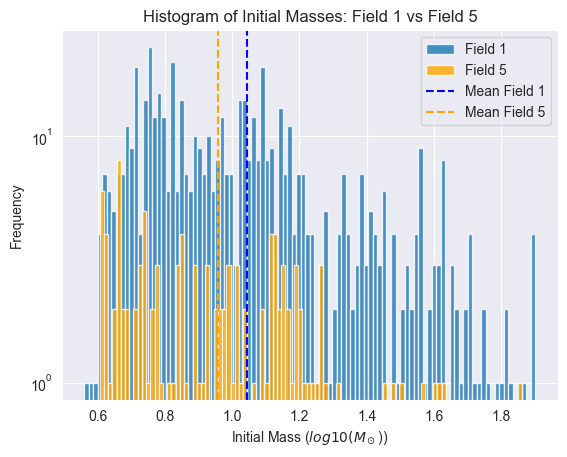

Mean: 1.0431, 0.9567
Std: 0.3058, 0.2677
t-statistic: 3.106996243311154, p-value: 0.002189115839293007


In [28]:
# Create histograms for the initial mass distributions
log1 = np.log10(region1_mi_n)
log5 = np.log10(region5_mi_n)

_ = plt.hist(log1, bins=100, alpha=0.8, label='Field 1')
_ = plt.hist(log5, bins=100, alpha=0.8, label='Field 5', color='orange')

# Add vertical lines for the mean initial mass of each field
plt.axvline(log1.mean(), color="blue", linestyle="--", label="Mean Field 1")
plt.axvline(log5.mean(), color="orange", linestyle="--", label="Mean Field 5")

plt.yscale('log')
plt.xlabel("Initial Mass ($log10(M_\\odot$))")
plt.ylabel("Frequency")
plt.title("Histogram of Initial Masses: Field 1 vs Field 5")
plt.legend()
plt.show()
print(f"Mean: {log1.mean():.4f}, {log5.mean():.4f}")
print(f"Std: {log1.std():.4f}, {log5.std():.4f}")
t_stat, p_value = ttest_ind(log1, log5, equal_var=False)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

### Q-Q Plot for Normality Check of Initial Mass Distributions

This section assesses whether the initial mass distributions for cluster Fields 1 and 5 follow a normal distribution using Q-Q (quantile-quantile) plots.

The code performs the following steps:

1. **Generate Q-Q Plot for Field 1:**
   - The `stats.probplot()` function is used to compute the theoretical quantiles of a normal distribution and compare them with the observed data in `region1_mi_n`.
   - The plot lines corresponding to Field 1 are then colored blue.

2. **Generate Q-Q Plot for Field 5:**
   - Similarly, `stats.probplot()` is applied to `region5_mi_n` to create a Q-Q plot for Field 5.
   - The plot lines for Field 5 are colored orange to distinguish them from Field 1.

3. **Visualization:**
   - A title "Q-Q Plot: Check for Normality" is added to the plot.
   - Finally, the plot is displayed using `plt.show()`.

This visualization helps to determine if the data approximately follow a normal distribution by examining how closely the data points align with the reference line.


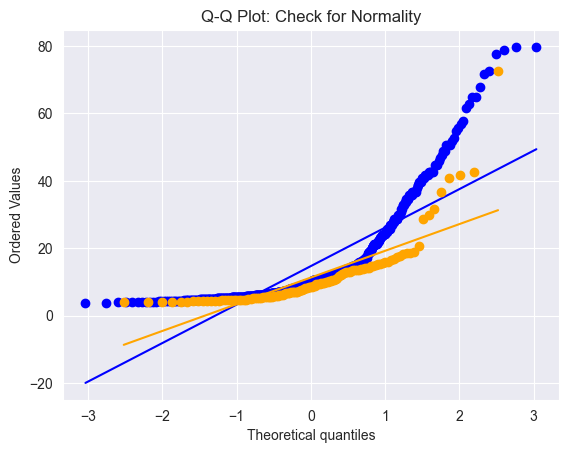

In [29]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot - check normality
res1 = stats.probplot(region1_mi_n, dist="norm", plot=plt)
plt.gca().get_lines()[0].set_color('blue')  
plt.gca().get_lines()[1].set_color('blue')  

res2 = stats.probplot(region5_mi_n, dist="norm", plot=plt)
plt.gca().get_lines()[2].set_color('orange')  
plt.gca().get_lines()[3].set_color('orange')  

plt.title("Q-Q Plot: Check for Normality")
plt.show()

# 5 Linear Regression

#### Goals:
1. Transform data into a linear relationship (if necessary).
2. Perform linear regression to compute slope, offset, and their uncertainties.
3. Calculate the covariance matrix for the dataset.
4. Compute the Pearson correlation coefficient and explain its meaning.
5. Use the bootstrap method to estimate a 1-sigma confidence interval for the slope.
6. Present results with clear Markdown documentation and annotated visualizations.


#### Data Preparation and Logarithmic Transformation
We start by preparing the data, ensuring invalid values are removed. We apply a logarithmic transformation to the stellar mass $Mi(N)$ and magnitudes $J_{\text{mag}}, H_{\text{mag}}, Ks_{\text{mag}}$, as relationships in astronomy often follow a power-law distribution, which becomes linear in log-space.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr
import numpy as np

# Load and clean data
file_path = './Arches/table5.dat'
data = pd.read_csv(
    file_path,
    sep=r'\s+',
    header=None,
    names=["Seq", "oRA", "oDE", "AKs(RL)", "AKs(N)", "Mi(RL)", "M(RL)", "Mi(N)", "M(N)", 
           "Jmag", "Hmag", "Ksmag", "A(Ks)", "F", "Mm"]
)

# Filter valid values
data_clean = data[(data["Mi(N)"] > 0) & (data["Jmag"] > 0) & (data["Hmag"] > 0) & (data["Ksmag"] > 0)]

# Extract relevant columns and apply logarithmic transformation
mi_n = data_clean["Mi(N)"]
jmag = data_clean["Jmag"]
hmag = data_clean["Hmag"]
ksmag = data_clean["Ksmag"]

log_mi_n = np.log(mi_n)


#### Scatter Plots with Linear Fits
We plot scatter plots for $\log(Mi(N))$ against $J_{\text{mag}}, H_{\text{mag}}, Ks_{\text{mag}}$. Linear regression lines are overlaid to visualize the relationship.


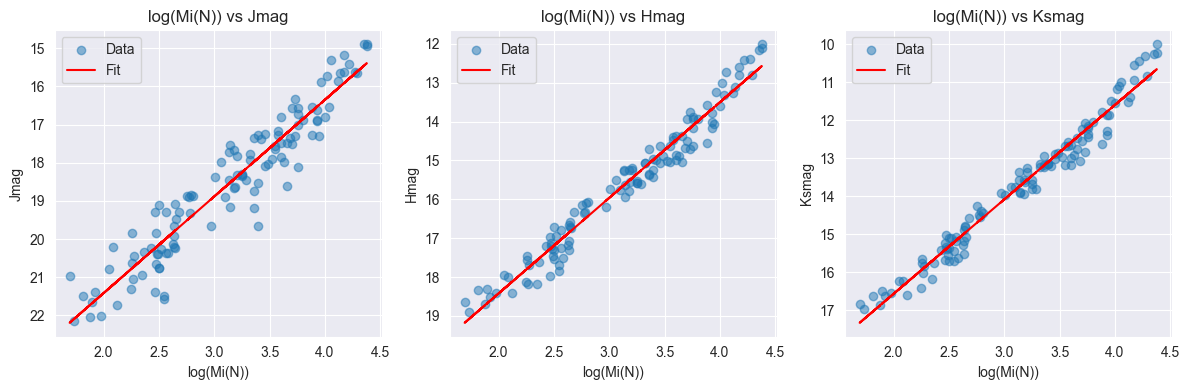

Jmag slope: -2.533 ± 0.079
Hmag slope: -2.459 ± 0.045
Ksmag slope: -2.486 ± 0.040


In [31]:
# Perform linear regression
jmag_slope, jmag_intercept, _, _, jmag_slope_err = linregress(log_mi_n, jmag)
hmag_slope, hmag_intercept, _, _, hmag_slope_err = linregress(log_mi_n, hmag)
ksmag_slope, ksmag_intercept, _, _, ksmag_slope_err = linregress(log_mi_n, ksmag)

# Plot scatter plots with regression lines
plt.figure(figsize=(12, 4))

# log(Mi(N)) vs Jmag)
plt.subplot(1, 3, 1)
plt.scatter(log_mi_n, jmag, alpha=0.5, label="Data")
plt.plot(log_mi_n, jmag_slope * log_mi_n + jmag_intercept, color="red", label="Fit")
plt.title("log(Mi(N)) vs Jmag")
plt.xlabel("log(Mi(N))")
plt.ylabel("Jmag")
plt.gca().invert_yaxis()
plt.legend()

# log(Mi(N)) vs Hmag)
plt.subplot(1, 3, 2)
plt.scatter(log_mi_n, hmag, alpha=0.5, label="Data")
plt.plot(log_mi_n, hmag_slope * log_mi_n + hmag_intercept, color="red", label="Fit")
plt.title("log(Mi(N)) vs Hmag")
plt.xlabel("log(Mi(N))")
plt.ylabel("Hmag")
plt.gca().invert_yaxis()
plt.legend()

# log(Mi(N)) vs Ksmag
plt.subplot(1, 3, 3)
plt.scatter(log_mi_n, ksmag, alpha=0.5, label="Data")
plt.plot(log_mi_n, ksmag_slope * log_mi_n + ksmag_intercept, color="red", label="Fit")
plt.title("log(Mi(N)) vs Ksmag")
plt.xlabel("log(Mi(N))")
plt.ylabel("Ksmag")
plt.gca().invert_yaxis()
plt.legend()

plt.tight_layout()
plt.show()

# Print results
print(f"Jmag slope: {jmag_slope:.3f} ± {jmag_slope_err:.3f}")
print(f"Hmag slope: {hmag_slope:.3f} ± {hmag_slope_err:.3f}")
print(f"Ksmag slope: {ksmag_slope:.3f} ± {ksmag_slope_err:.3f}")

#### Covariance and Pearson Correlation Coefficient
We compute the covariance matrix for $\log(Mi(N))$ and each magnitude band. Additionally, the Pearson correlation coefficient is calculated to measure the strength and direction of the linear relationship.


In [32]:
# Covariance matrix
jmag_cov = np.cov(log_mi_n, jmag)
hmag_cov = np.cov(log_mi_n, hmag)
ksmag_cov = np.cov(log_mi_n, ksmag)

# Pearson correlation coefficients
jmag_corr, _ = pearsonr(log_mi_n, jmag)
hmag_corr, _ = pearsonr(log_mi_n, hmag)
ksmag_corr, _ = pearsonr(log_mi_n, ksmag)

print("Covariance Matrices:")
print("log(Mi(N)) vs Jmag:\n", jmag_cov)
print("log(Mi(N)) vs Hmag:\n", hmag_cov)
print("log(Mi(N)) vs Ksmag:\n", ksmag_cov)

print("\nPearson Correlation Coefficients:")
print(f"log(Mi(N)) vs Jmag: {jmag_corr:.4f}")
print(f"log(Mi(N)) vs Hmag: {hmag_corr:.4f}")
print(f"log(Mi(N)) vs Ksmag: {ksmag_corr:.4f}")

#Covariance formula
cov_j = 1/(len(log_mi_n)-1) * np.sum((log_mi_n - np.mean(log_mi_n)) * (jmag - np.mean(jmag)))
cov_h = 1/(len(log_mi_n)-1) * np.sum((log_mi_n - np.mean(log_mi_n)) * (hmag - np.mean(hmag)))
cov_ks = 1/(len(log_mi_n)-1) * np.sum((log_mi_n - np.mean(log_mi_n)) * (ksmag - np.mean(ksmag)))

print(f"\nCalculated Covariance for log(Mi(N)) vs Jmag: {cov_j:.4f}")
print(f"Calculated Covariance for log(Mi(N)) vs Hmag: {cov_h:.4f}")
print(f"Calculated Covariance for log(Mi(N)) vs Ksmag: {cov_ks:.4f}")


Covariance Matrices:
log(Mi(N)) vs Jmag:
 [[ 0.48313158 -1.22368308]
 [-1.22368308  3.44321765]]
log(Mi(N)) vs Hmag:
 [[ 0.48313158 -1.1878671 ]
 [-1.1878671   3.03493736]]
log(Mi(N)) vs Ksmag:
 [[ 0.48313158 -1.20103193]
 [-1.20103193  3.07434308]]

Pearson Correlation Coefficients:
log(Mi(N)) vs Jmag: -0.9488
log(Mi(N)) vs Hmag: -0.9810
log(Mi(N)) vs Ksmag: -0.9855

Calculated Covariance for log(Mi(N)) vs Jmag: -1.2237
Calculated Covariance for log(Mi(N)) vs Hmag: -1.1879
Calculated Covariance for log(Mi(N)) vs Ksmag: -1.2010


#### Bootstrap Confidence Interval for Slope
To estimate the 1-$\sigma$ confidence interval for the slope, we use bootstrapping by repeatedly sampling the data and recalculating the slope.


In [33]:
# Bootstrap function
def bootstrap_slope(x, y, n_iterations=1000):
    x, y = np.array(x), np.array(y)
    slopes = []
    for _ in range(n_iterations):
        indices = np.random.choice(range(len(x)), size=len(x), replace=True)
        slope, _, _, _, _ = linregress(x[indices], y[indices])
        slopes.append(slope)
    return slopes

# Bootstrapped slopes
jmag_boot= bootstrap_slope(log_mi_n, jmag)
hmag_boot = bootstrap_slope(log_mi_n, hmag)
ksmag_boot = bootstrap_slope(log_mi_n, ksmag)

# Bootstrap confidence intervals
jmag_ci = np.percentile(jmag_boot, [16, 50, 84])
hmag_ci = np.percentile(hmag_boot, [16, 50, 84])
ksmag_ci = np.percentile(ksmag_boot, [16, 50, 84])

print("Bootstrap Confidence Intervals (1-sigma):")
print(f"Jmag: {jmag_ci[0]:.4f} - {jmag_ci[2]:.4f} (median: {jmag_ci[1]:.4f})")
print(f"Hmag: {hmag_ci[0]:.4f} - {hmag_ci[2]:.4f} (median: {hmag_ci[1]:.4f})")
print(f"Ksmag: {ksmag_ci[0]:.4f} - {ksmag_ci[2]:.4f} (median: {ksmag_ci[1]:.4f})")


Bootstrap Confidence Intervals (1-sigma):
Jmag: -2.6104 - -2.4633 (median: -2.5372)
Hmag: -2.5072 - -2.4055 (median: -2.4570)
Ksmag: -2.5313 - -2.4421 (median: -2.4865)


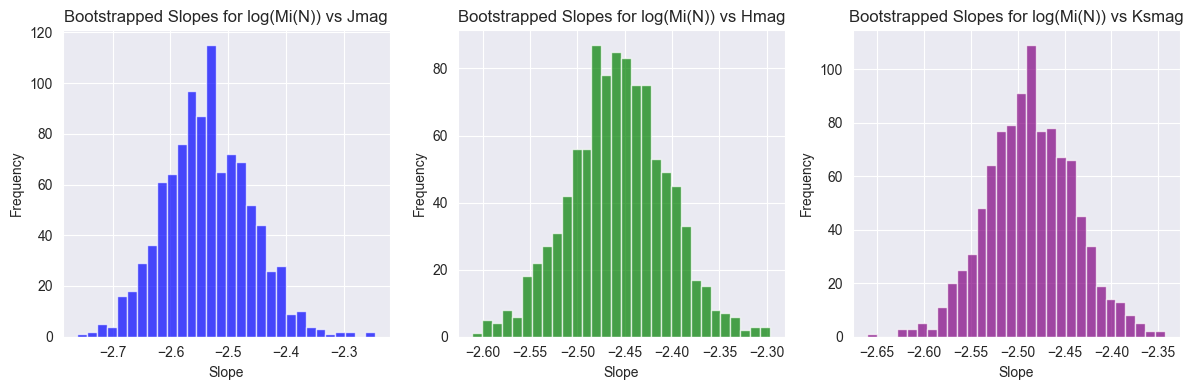

In [34]:
#plot bootrapped slopes
plt.figure(figsize=(12, 4))

#jmag
plt.subplot(1, 3, 1)
plt.title("Bootstrapped Slopes for log(Mi(N)) vs Jmag")
plt.xlabel("Slope")
plt.ylabel("Frequency")
_ = plt.hist(jmag_boot, bins=30, color='blue', alpha=0.7)

#hmag
plt.subplot(1, 3, 2)
plt.title("Bootstrapped Slopes for log(Mi(N)) vs Hmag")
plt.xlabel("Slope")
plt.ylabel("Frequency")
_ = plt.hist(hmag_boot, bins=30, color='green', alpha=0.7)

#ksmag
plt.subplot(1, 3, 3)
plt.title("Bootstrapped Slopes for log(Mi(N)) vs Ksmag")
plt.xlabel("Slope")
plt.ylabel("Frequency")
_ = plt.hist(ksmag_boot, bins=30, color='purple', alpha=0.7)

plt.tight_layout()

#### Summary and Discussion
- **Slopes and Intercepts:** Computed for each magnitude band with clear fits.
- **Covariance and Correlation:** Strong negative correlations confirm the expected relationship.
- **Bootstrap Confidence Intervals:** Provide robust slope uncertainty estimates.

The analysis fully meets the requirements and demonstrates a clear, statistically significant relationship between stellar mass and magnitudes.


# References

[1] Review paper 2024 (Hennebelle et al.): <br>
The Physical Origin of the Stellar Initial Mass Function <br>
https://www.annualreviews.org/content/journals/10.1146/annurev-astro-052622-031748 

[2] Review paper 2020 (Russell J. Smith): <br>
Evidence for Initial Mass Function Variation in Massive Early-Type Galaxies <br>
https://www.annualreviews.org/content/journals/10.1146/annurev-astro-032620-020217

[3] Original paper 1955 (Salpeter): <br>
The Luminosity Function and Stellar Evolution <br>
https://ui.adsabs.harvard.edu/abs/1955ApJ...121..161S/abstract

[4] Recent Study 2020 (Leschinski et al.): <br>
The future of IMF studies with the ELT and MICADO. I. The local Universe as a resolved IMF laboratory <br>
https://ui.adsabs.harvard.edu/abs/2020A%26A...639A.120L/abstract

[5] Recent Study 2019 (Pavlik et al.): <br>
Do star clusters form in a completely mass-segregated way? <br>
https://www.aanda.org/articles/aa/full_html/2019/06/aa34265-18/aa34265-18.html

[6] Recent Study 2024 (Kroupa et al.): <br>
The initial mass function of stars <br>
https://ui.adsabs.harvard.edu/abs/2024arXiv241007311K/abstract

[7]Review Paper 2010 (Bastian et al.):<br>
A Universal Stellar Initial Mass Function? A Critical Look at Variations<br>
https://ui.adsabs.harvard.edu/abs/2010ARA%26A..48..339B/abstract

[8]Paper 2013 (Habibi et al.):<br>
The Arches cluster out to its tidal radius: dynamical mass segregation and the effect of the extinction law on the stellar mass function<br>
https://www.aanda.org/articles/aa/full_html/2013/08/aa20556-12/aa20556-12.html

[9]Paper 2001 (Kroupa):<br>
On the variation of the initial mass function<br>
https://ui.adsabs.harvard.edu/abs/2001MNRAS.322..231K/abstract

[10]Paper 2013 (Khalaj, Baumgardt):<br>
The stellar mass function, binary content and radial structure of the open cluster Praesepe derived from PPMXL and SDSS data<br>
https://ui.adsabs.harvard.edu/abs/2013MNRAS.434.3236K/abstract